In [3]:
import pandas as pd
import missingno as msno

# Gastroumsatz

In [4]:
file = "Daten/gastro_filtered.csv"
df_gastro = pd.read_csv(file, delimiter=",", encoding="latin1")

<Axes: >

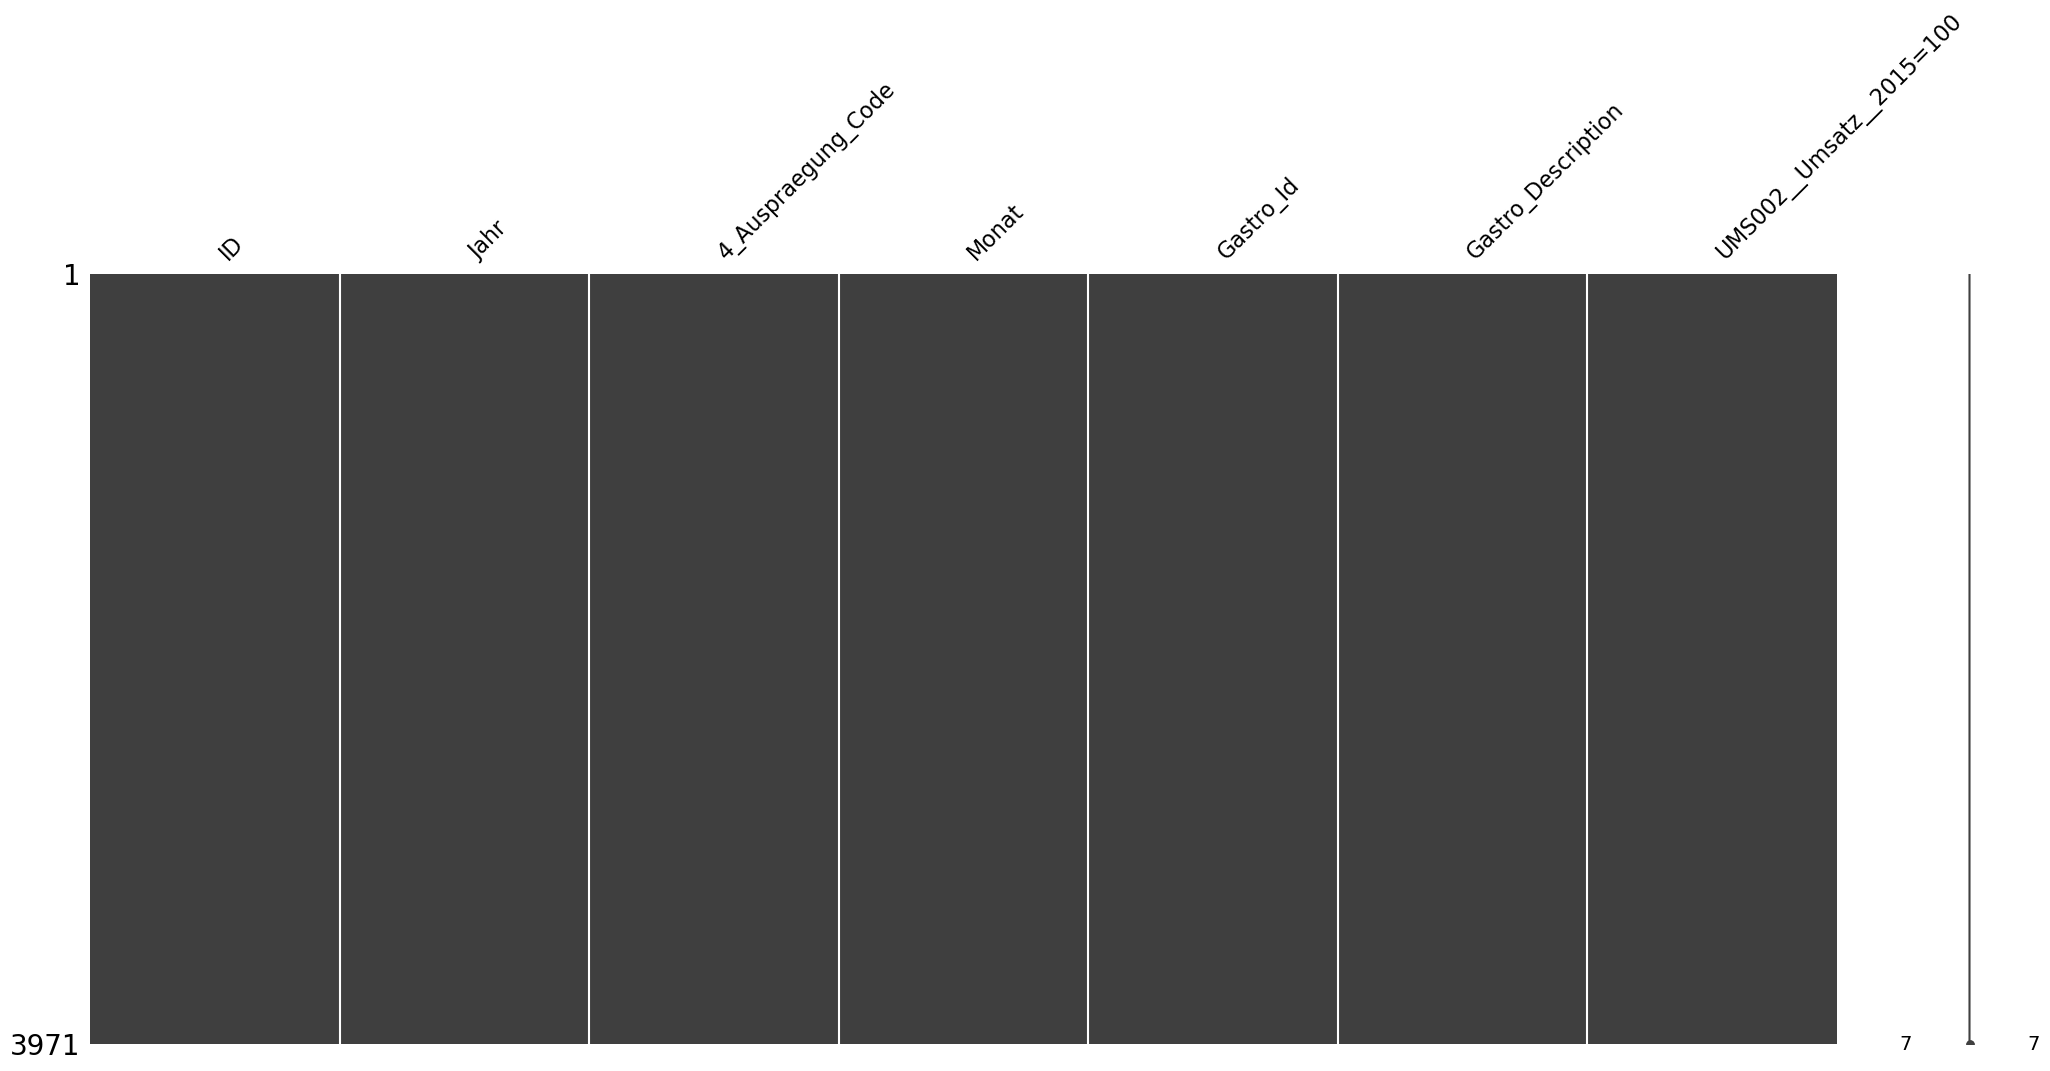

In [14]:
msno.matrix(df_gastro)

In [5]:
df_gastro

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, GasthÃÂÃÂ¶fe und Pensionen",91.9
2,2,1994,MONAT01,Januar,WZ08-552,FerienunterkÃÂÃÂ¼nfte u. ÃÂÃÂ¤hnliche Be...,97.3
3,3,1994,MONAT01,Januar,WZ08-553,CampingplÃÂÃÂ¤tze,68.4
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige BeherbergungsstÃÂÃÂ¤tten,127.1
...,...,...,...,...,...,...,...
3966,3966,2024,MONAT01,Januar,WZ08-561,"Restaurants, GaststÃÂÃÂ¤tten, Imbissstuben,...",76.6
3967,3967,2024,MONAT01,Januar,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4
3968,3968,2024,MONAT01,Januar,WZ08-563,Ausschank von GetrÃÂÃÂ¤nken,52.0
3969,3969,2024,MONAT01,Januar,WZ08-561-01,GaststÃÂÃÂ¤ttengewerbe,74.1


In [4]:

# Umbenennen von Spalten
#df_gastro = df_gastro.rename(columns={'Zeit': 'Jahr', '4_Auspraegung_Label': 'Monat', "5_Auspraegung_Code": "Unternehmen_Id", "5_Auspraegung_Label": "Unternehmensbeschreibung","UMS002__Umsatz__2015=100" : "Umsatz in millionen"})
df_gastro = df_gastro.rename(columns={"4_Auspraegung_Code": "Monatscode"})

# Speichern der aktualisierten Daten in einer neuen CSV-Datei
df_gastro.to_csv(file, index=False)

print("Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.")


Die Spalten wurden erfolgreich umbenannt und die aktualisierte CSV-Datei wurde gespeichert.


## Wetterdaten formatieren
von .txt zu .csv

In [17]:
import os

# Definiere den Ordnerpfad
ordnerpfad = './Wetterdaten'

# Durchlaufe jeden Ordner im Hauptordner
for ordnername in os.listdir(ordnerpfad):
    # Überprüfe, ob es sich um einen Ordner handelt
    if os.path.isdir(os.path.join(ordnerpfad, ordnername)):
        # Durchlaufe jede Datei im Unterordner
        unterordner_pfad = os.path.join(ordnerpfad, ordnername)
        for dateiname in os.listdir(unterordner_pfad):
            # Überprüfe, ob die Datei eine .txt-Datei ist
            if dateiname.endswith('.txt'):
                # Baue den alten und neuen Dateinamen
                alter_pfad = os.path.join(unterordner_pfad, dateiname)
                neuer_name = os.path.splitext(dateiname)[0] + '.csv'
                neuer_pfad = os.path.join(unterordner_pfad, neuer_name)
                
                # Umbenenne die Datei
                os.rename(alter_pfad, neuer_pfad)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Wetterdaten'

In [ ]:
import csv
import re

def replace_umlauts(name):
    # Ersetze 'ä' mit 'ae', 'ö' mit 'oe', 'ü' mit 'ue'
    name = re.sub(r'ä', 'ae', name)
    name = re.sub(r'ö', 'oe', name)
    name = re.sub(r'ü', 'ue', name)
    return name

# Pfad zur CSV-Datei
csv_file = './Umsatzdaten/Gastronomieumsaetze_flat.csv'
# Pfad zur Ausgabedatei
output_file = 'Gastronomieumsaetze_flat_update.csv'

with open(csv_file, newline='', encoding='latin-1') as infile, \
        open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Durchlaufe jede Zeile und ersetze die Namen
        modified_row = [replace_umlauts(cell) for cell in row]
        # Schreibe die modifizierte Zeile in die Ausgabedatei
        writer.writerow(modified_row)

print("CSV-Datei wurde erfolgreich verarbeitet.")

CSV-Datei wurde erfolgreich verarbeitet.


In [13]:
df_gastro['Umsatz in millionen'] = df_gastro['Umsatz in millionen'].str.replace(',', '.').astype(float)

In [16]:
df_gastro.to_csv(file, index=False)

In [6]:
monatstat = df_gastro.groupby(["Gastro_Description", "Monatscode"])["Umsatz in millionen"].sum()

In [7]:
spalte_a_wert = 'Gastro_Description'
gewuenschter_wert = monatstat.loc["Gastgewerbe"]
gewuenschter_wert

Monatscode
MONAT01    2865.9
MONAT02    2808.9
MONAT03    3122.7
MONAT04    3198.0
MONAT05    3575.9
MONAT06    3545.8
MONAT07    3628.7
MONAT08    3638.4
MONAT09    3739.7
MONAT10    3605.1
MONAT11    3109.0
MONAT12    3313.1
Name: Umsatz in millionen, dtype: float64